In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


In [23]:
df = pd.read_csv('titanic_toy.csv')
df.sample(10)

,Age,Fare,Family,Survived
149,42.0,13.0000,0,0
341,24.0,263.0000,5,1
346,40.0,13.0000,0,1
589,NaN,8.0500,0,0
726,30.0,21.0000,3,1
160,44.0,16.1000,1,0
31,NaN,146.5208,1,1
458,50.0,10.5000,0,1
531,NaN,7.2292,0,0
150,51.0,12.5250,0,0


In [24]:
# filling with extreme values is a part of arbitary imputation
X = df.drop(columns= 'Survived')
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)
X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_minus1'] = X_train['Age'].fillna(-1)

X_train['Fare_999'] = X_train['Fare'].fillna(999)
X_train['Fare_minus1'] = X_train['Fare'].fillna(-1)

X_train.sample(5)

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
588,22.0,8.0500,0,22.0,22.0,8.0500,8.0500
481,NaN,0.0000,0,99.0,-1.0,0.0000,0.0000
296,23.5,7.2292,0,23.5,23.5,7.2292,7.2292
701,35.0,26.2875,0,35.0,35.0,26.2875,26.2875
131,20.0,7.0500,0,20.0,20.0,7.0500,7.0500


In [25]:
# getting variance for all of them 
print('Fare',X_train['Fare'].var())
print('Fare_999',X_train['Fare_999'].var())
print('Fare_minus1',X_train['Fare_minus1'].var())

print('Age',X_train['Age'].var())
print('Age_99',X_train['Age_99'].var())
print('Age_minus1',X_train['Age_minus1'].var())

Fare 2480.3750629598235
Fare_999 51969.41957539705
Fare_minus1 2399.441699640563
Age 208.05652643506042
Age_99 951.4333143995249
Age_minus1 311.8818083706685


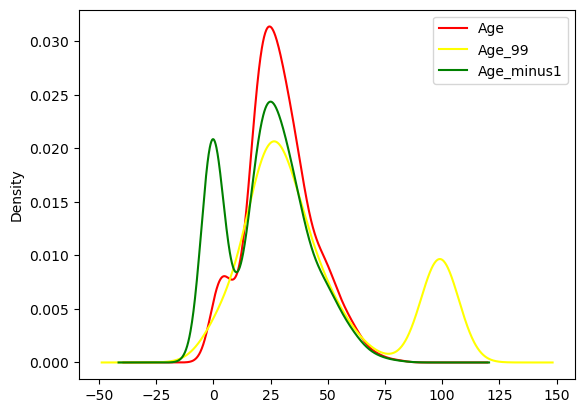

In [26]:
ax = plt.subplot(111)
X_train['Age'].plot(kind = 'kde', ax=ax,color = 'Red' )
X_train['Age_99'].plot(kind = 'kde', ax=ax,color = 'Yellow' )
X_train['Age_minus1'].plot(kind = 'kde', ax=ax,color = 'Green' )
plt.legend()

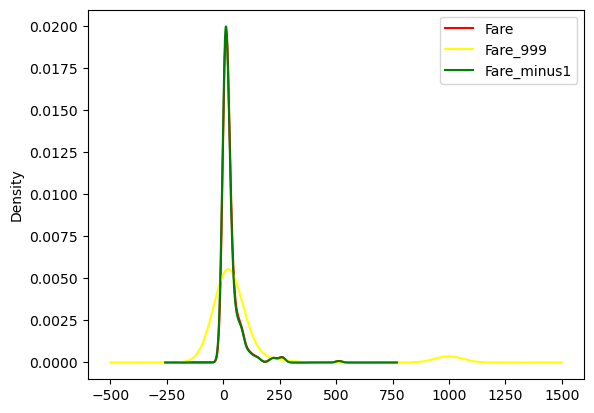

In [27]:
ax1 = plt.subplot(111)
X_train['Fare'].plot(kind = 'kde', ax=ax1,color = 'Red' )
X_train['Fare_999'].plot(kind = 'kde', ax=ax1,color = 'Yellow' )
X_train['Fare_minus1'].plot(kind = 'kde', ax=ax1,color = 'Green' )
plt.legend()

In [28]:
X_train.cov()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,208.056526,58.958486,-6.967869,208.056526,208.056526,84.180061,54.365833
Fare,58.958486,2480.375063,18.807166,-89.436926,105.563728,2480.375063,2480.375063
Family,-6.967869,18.807166,2.645965,-9.416381,-3.908235,15.671289,17.820502
Age_99,208.056526,-89.436926,-9.416381,951.433314,-171.995704,-254.661057,-78.554449
Age_minus1,208.056526,105.563728,-3.908235,-171.995704,311.881808,205.900902,95.972648
Fare_999,84.180061,2480.375063,15.671289,-254.661057,205.900902,51969.419575,635.338522
Fare_minus1,54.365833,2480.375063,17.820502,-78.554449,95.972648,635.338522,2399.441700


In [29]:
X_train.corr()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,1.000000,0.076967,-0.314981,1.000000,1.000000,0.024895,0.072670
Fare,0.076967,1.000000,0.229317,-0.057884,0.119488,1.000000,1.000000
Family,-0.314981,0.229317,1.000000,-0.187673,-0.136048,0.042261,0.223652
Age_99,1.000000,-0.057884,-0.187673,1.000000,-0.315743,-0.036216,-0.051991
Age_minus1,1.000000,0.119488,-0.136048,-0.315743,1.000000,0.051143,0.110942
Fare_999,0.024895,1.000000,0.042261,-0.036216,0.051143,1.000000,0.056895
Fare_minus1,0.072670,1.000000,0.223652,-0.051991,0.110942,0.056895,1.000000


##### Using SkLearn:

In [30]:
X_train1, X_test1, y_train1, y_test1= train_test_split(X, y, test_size= 0.2)
imputer1 = SimpleImputer(strategy= 'constant', fill_value= 99)
imputer2 = SimpleImputer(strategy= 'constant', fill_value= 999)
trf = ColumnTransformer([
    ('impute1',imputer1, ['Age']),
    ('impute2',imputer2, ['Fare'])  
], remainder= 'passthrough')

In [31]:
X_train1 = trf.fit_transform(X_train1)
X_test1 = trf.transform(X_test1)
X_train1

array([[99.    , 69.55  , 10.    ],
       [58.    , 29.7   ,  0.    ],
       [50.    , 10.5   ,  0.    ],
       ...,
       [20.    ,  7.8542,  0.    ],
       [43.    , 46.9   ,  7.    ],
       [99.    , 27.7208,  0.    ]])